In [ ]:
 #!pip install datasets pandas matplotlib seaborn

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Load
dataset = load_dataset("gretelai/synthetic_text_to_sql")
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

In [3]:
print(f"Train: {len(train_df):,}, Test: {len(test_df):,}")
print(f"Columns: {train_df.columns.tolist()}")
print(f"\nMissing values:\n{train_df.isnull().sum()}")

Train: 100,000, Test: 5,851
Columns: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation']

Missing values:
id                            0
domain                        0
domain_description            0
sql_complexity                0
sql_complexity_description    0
sql_task_type                 0
sql_task_type_description     0
sql_prompt                    0
sql_context                   0
sql                           0
sql_explanation               0
dtype: int64


In [4]:
# Analyze
domain_counts = train_df['domain'].value_counts()
complexity_counts = train_df['sql_complexity'].value_counts()

print(f"\nTop 10 domains:")
print(domain_counts.head(10))
print(f"\nComplexity distribution:")
print(complexity_counts)


Top 10 domains:
domain
ethical fashion               1368
cybersecurity                 1360
rural development             1357
hospitality                   1296
sustainable infrastructure    1266
waste management              1240
telecommunications            1216
gaming technology             1208
human resources               1204
education                     1204
Name: count, dtype: int64

Complexity distribution:
sql_complexity
basic SQL           48466
aggregation         22015
single join         14932
subqueries           6719
window functions     3596
multiple_joins       2949
set operations       1050
CTEs                  273
Name: count, dtype: int64


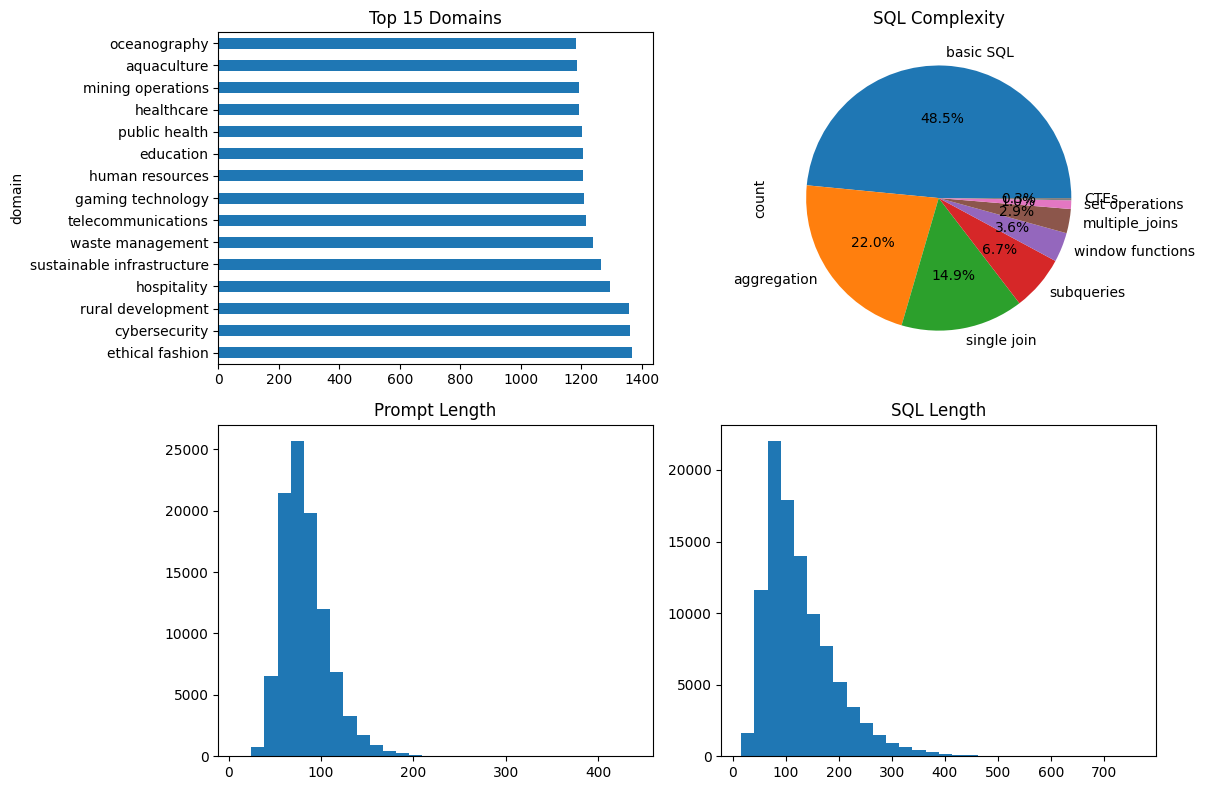

In [5]:
# Text lengths
train_df['prompt_len'] = train_df['sql_prompt'].str.len()
train_df['sql_len'] = train_df['sql'].str.len()

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

domain_counts.head(15).plot(kind='barh', ax=axes[0,0])
axes[0,0].set_title('Top 15 Domains')

complexity_counts.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('SQL Complexity')

axes[1,0].hist(train_df['prompt_len'], bins=30)
axes[1,0].set_title('Prompt Length')

axes[1,1].hist(train_df['sql_len'], bins=30)
axes[1,1].set_title('SQL Length')

plt.tight_layout()
plt.show()